In [1]:
import pandas as pd

dataset_link = 'https://sololearn.com/uploads/files/iris.csv'
iris = pd.read_csv(dataset_link)
iris.shape

In [2]:
iris.head()

In [3]:
iris.drop('id', axis=1, inplace=True)
iris.head()

In [4]:
iris.describe()

In [5]:
iris.groupby('species').size()

In [6]:
# This dataset is balanced
iris['species'].value_counts()

# Data visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

iris.hist(color='red')
plt.show();

In [8]:
# Build a dict mapping species to an integer code
inv_name_dict = {
    'iris-setosa': 0,
    'iris-versicolor': 1,
    'iris-virginica': 2
}

# Build integer color code 0/1/2
colors = [inv_name_dict[item] for item in iris['species']]

# Scatter plot
scatter = plt.scatter(iris['sepal_len'],
                      iris['sepal_wd'],
                      c=colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

# Add legend
plt.legend(handles=scatter.legend_elements()[0],
           labels=inv_name_dict.keys())
plt.show()

In [9]:
pd.plotting.scatter_matrix(iris, color='tomato');

### [pandas.plotting.scatter_matrix](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27, stratify=y)

Note that we specified the split was stratified by label (y). This is done to ensure that the distribution of labels remains similar in both train and test sets:

In [11]:
y_train.value_counts()

In [12]:
y_test.value_counts()

In classifications, stratified sampling is often chosen to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set.

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

In [14]:
pred = knn.predict(X_test)
pred[:5]

In [15]:
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob

In [16]:
y_pred = knn.predict(X_test)
y_pred

In [17]:
# Accuracy not from Scikit-learn
(y_pred == y_test.values).sum()

In [18]:
y_test

In [19]:
knn.score(X_test, y_test)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

In [21]:
type(y_test)

In [22]:
(y_pred == y_test.values).sum()
y_test.size

### Confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=['iris-setosa', 'iris-versicolor', 'iris-virginica'])
cm

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['iris-setosa', 'iris-versicolor', 'iris-virginica'])
disp.plot();

In [25]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))

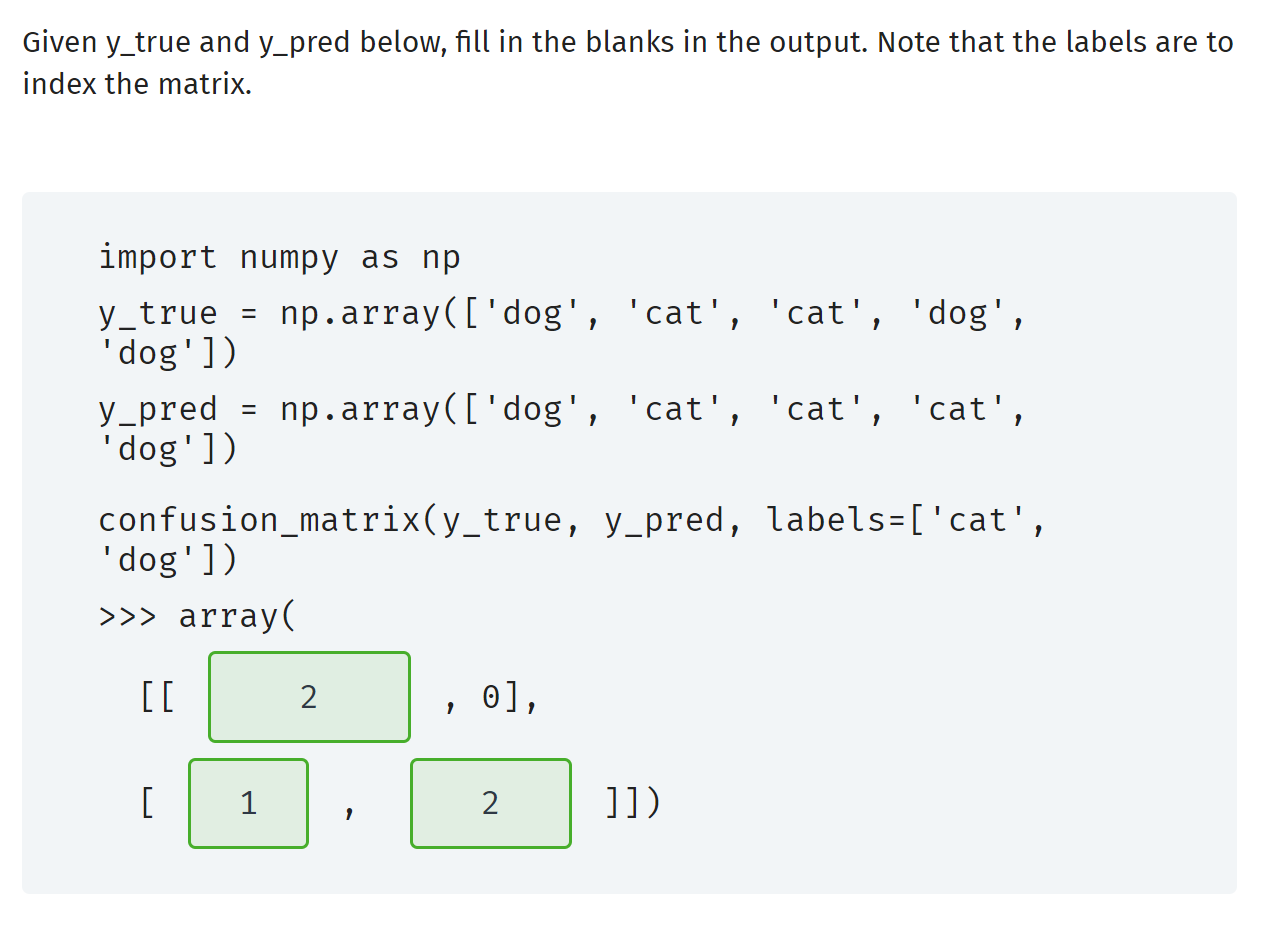

### K-fold Cross Validation

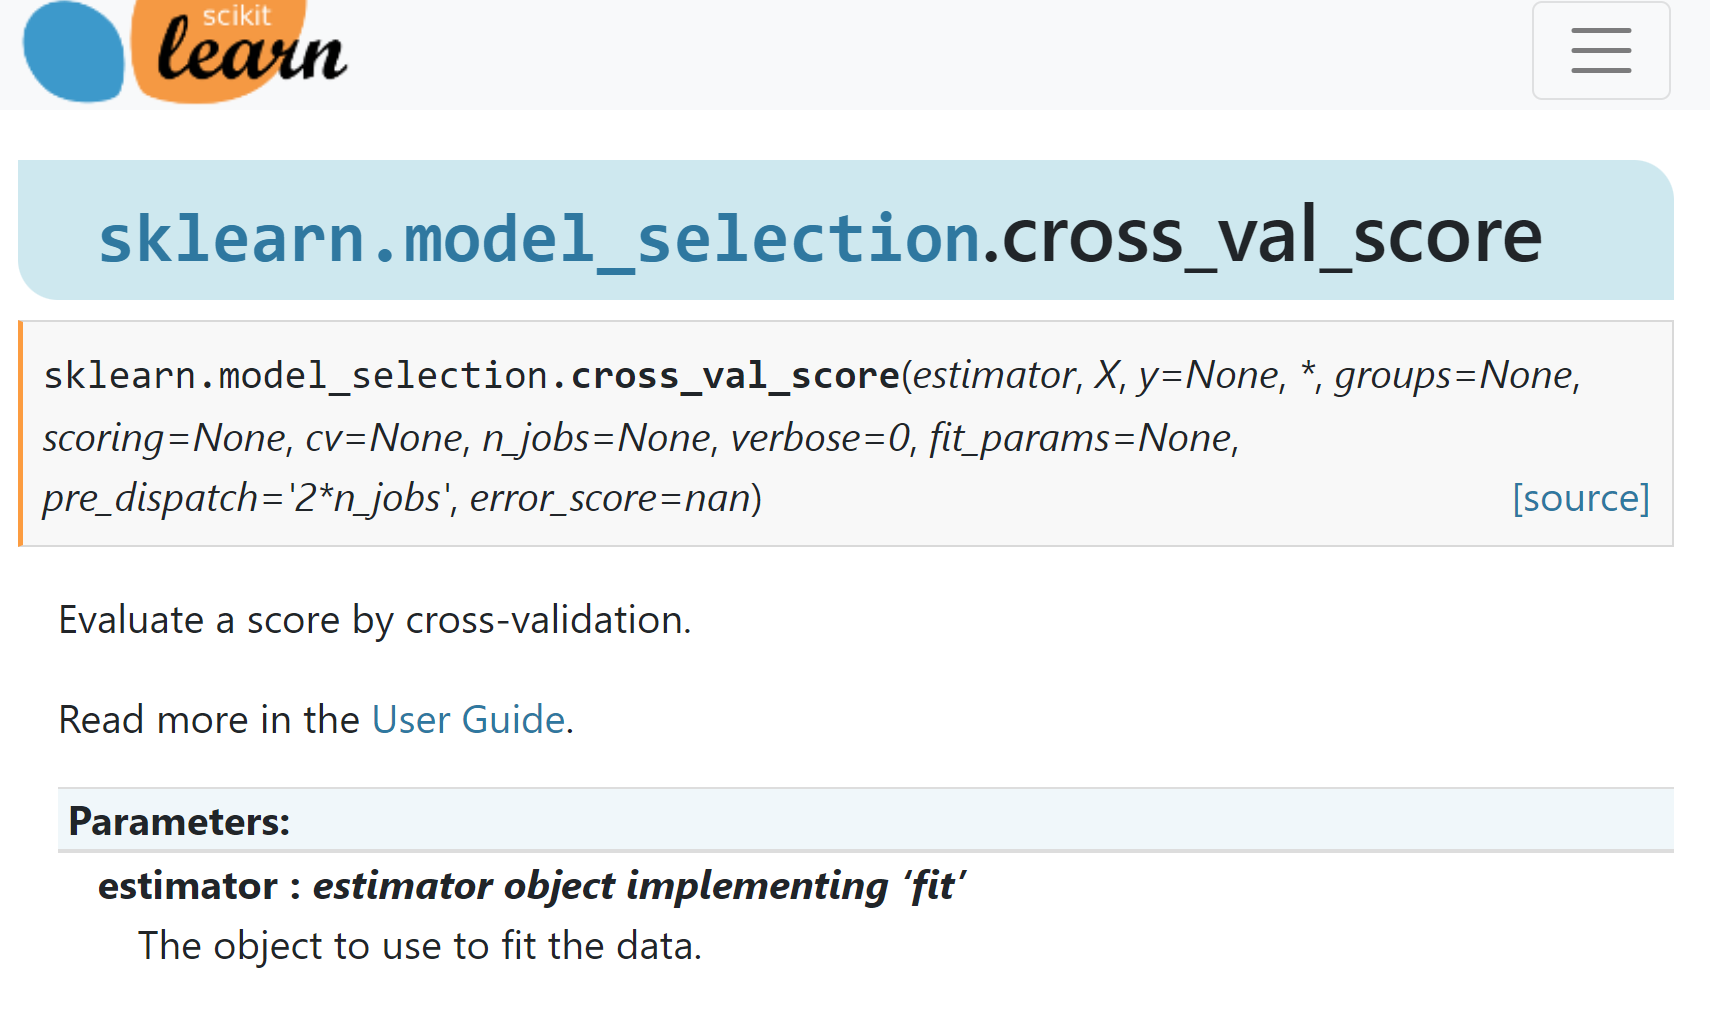

In [26]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
cv_scores

In [27]:
# Then average them
cv_scores.mean()

In [28]:
# Grid Search
import numpy as np
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()
param_grid = {
    'n_neighbors': np.arange(2, 10)
}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X, y)

In [29]:
# Check the top performing n_neighbors value
knn_gscv.best_params_

In [30]:
# Accuracy of the model with best parameters
knn_gscv.best_score_

In [31]:
final_model = KNeighborsClassifier(
    n_neighbors = knn_gscv.best_params_['n_neighbors'],
)
final_model.fit(X, y)
y_pred = final_model.predict(X)
final_model.score(X, y)

## Label prediction with new data

In [32]:
new_data = np.array([3.76, 1.2])
final_model.predict(np.array(new_data.reshape(1, -1)))

In [33]:
more_data = np.array([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])
final_model.predict(more_data)

In [34]:
final_model.predict_proba(more_data)

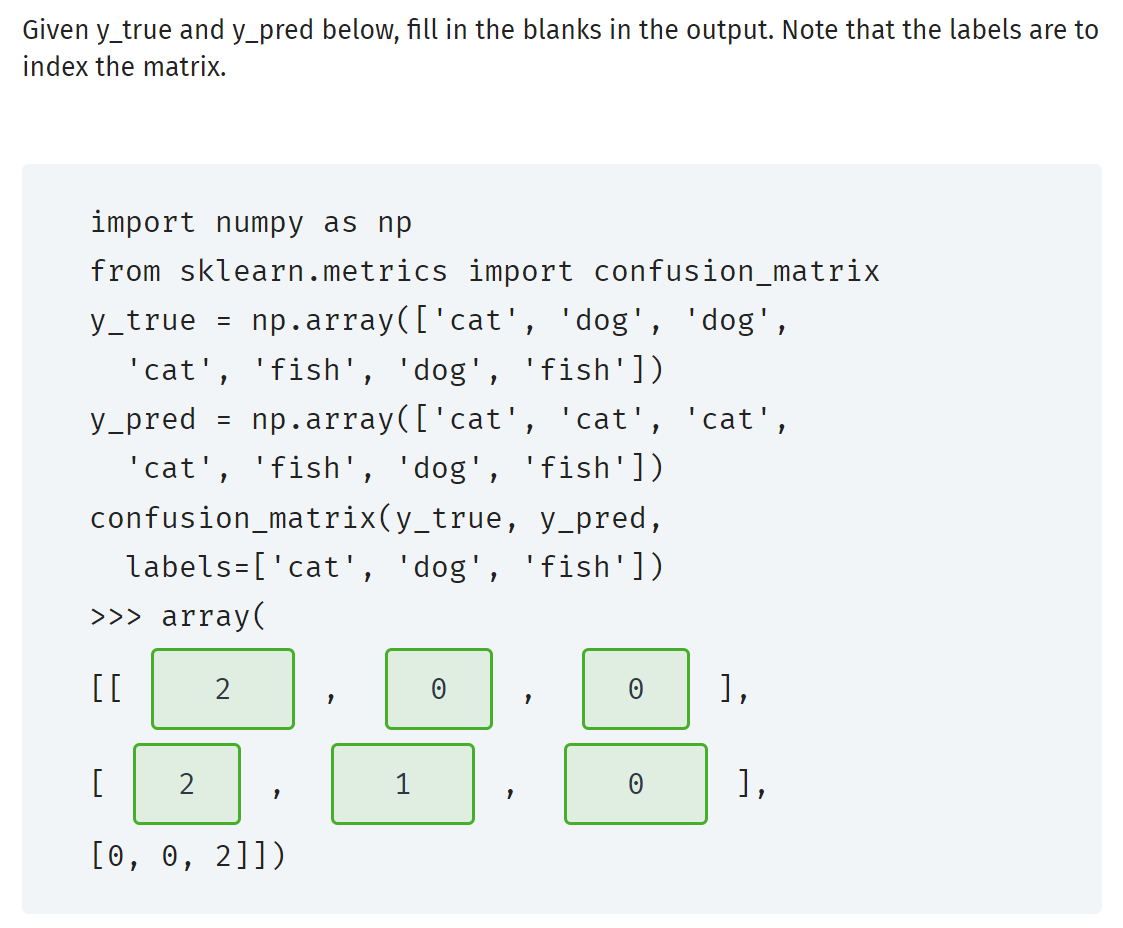

# Clastering

In [35]:
from sklearn.cluster import KMeans

In [36]:
# Euclidean distance
import numpy as np
x1 = np.array([0, 1])
x2 = np.array([2, 0])
np.sqrt(((x1 - x2) ** 2).sum())

In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
print(wine.shape)
print(wine.columns)

In [38]:
wine.describe()

In [39]:
# Scatter matrix
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(wine.iloc[:, :4])
plt.show();

In [40]:
from sklearn.preprocessing import StandardScaler

X = wine[['alcohol', 'total_phenols']]
scale = StandardScaler()
scale.fit(X)

In [41]:
scale.mean_

In [42]:
# Std
scale.scale_

In [43]:
X_scaled = scale.transform(X)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

# Task 1
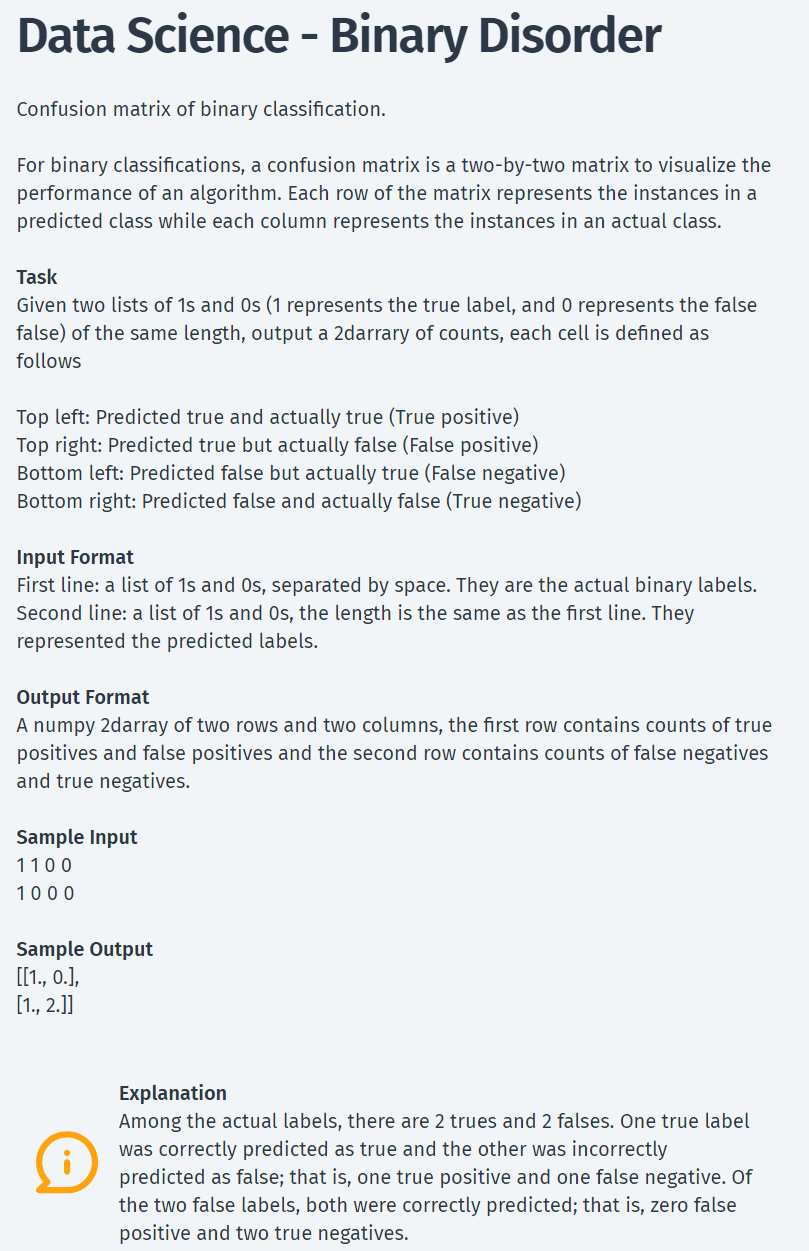

Sample Input

1 1 0 0

1 0 0 0

In [44]:
import numpy as np

y_true = np.array([int(x) for x in input().split()])
y_pred = np.array([int(x) for x in input().split()])

tp = ((y_true == y_pred) & (y_pred == 1)).sum()
fp = ((y_true != y_pred) & (y_pred == 1)).sum()
fn = ((y_true != y_pred) & (y_pred == 0)).sum()
tn = ((y_true == y_pred) & (y_pred == 0)).sum()

print(np.array((tp, fp, fn, tn), dtype=np.float32).reshape(2, -1))

1 1 0 0
1 0 0 0


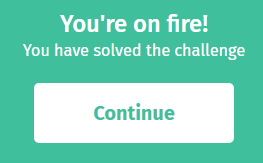

In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
print(y_pred)

In [46]:
kmeans.cluster_centers_

In [47]:
# Visualize the results
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred);

In [48]:
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker = '*',
            s = 250,
            c = [0, 1, 2],
            edgecolors = 'k');

In [49]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker = '*',
            s = 250,
            c = [0, 1, 2],
            edgecolors = 'k')
plt.xlabel('alcohol')
plt.ylabel('total phenols')
plt.title('k-means (k = 3)')
plt.show();

In [50]:
# Check new data
X_new = np.array([[13, 2.5]])
X_new_scaled = scale.transform(X_new)
print(X_new_scaled)

In [51]:
kmeans.predict(X_new_scaled)

In [52]:
# Inertia
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X_scaled)
kmeans.inertia_

In [53]:
# Visualize inertia
import numpy as np

inertia = []
for i in np.arange(1, 11):
    km = KMeans(n_clusters=i, n_init='auto')
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show();

In [54]:
# Model with all features
X = wine
scale = StandardScaler()
X_scaled = scale.fit_transform(X)
inertia = []

for i in np.arange(1, 11):
    km = KMeans(n_clusters=i, n_init='auto')
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
plt.plot(np.arange(1, 11), inertia, marker='o', color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('All features')
plt.show();

In [55]:
# Prediction
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, n_init='auto')
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
y_pred

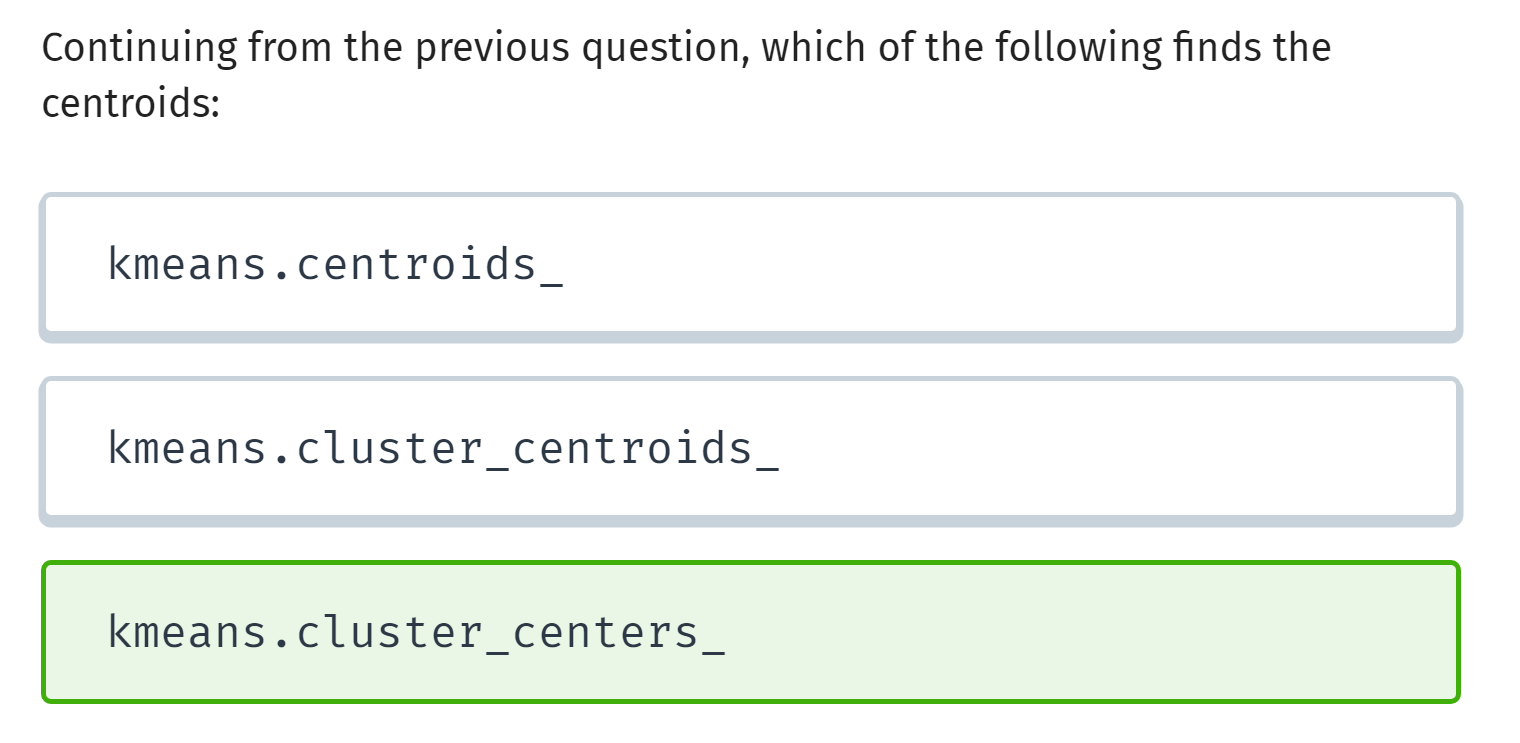

# Task 2
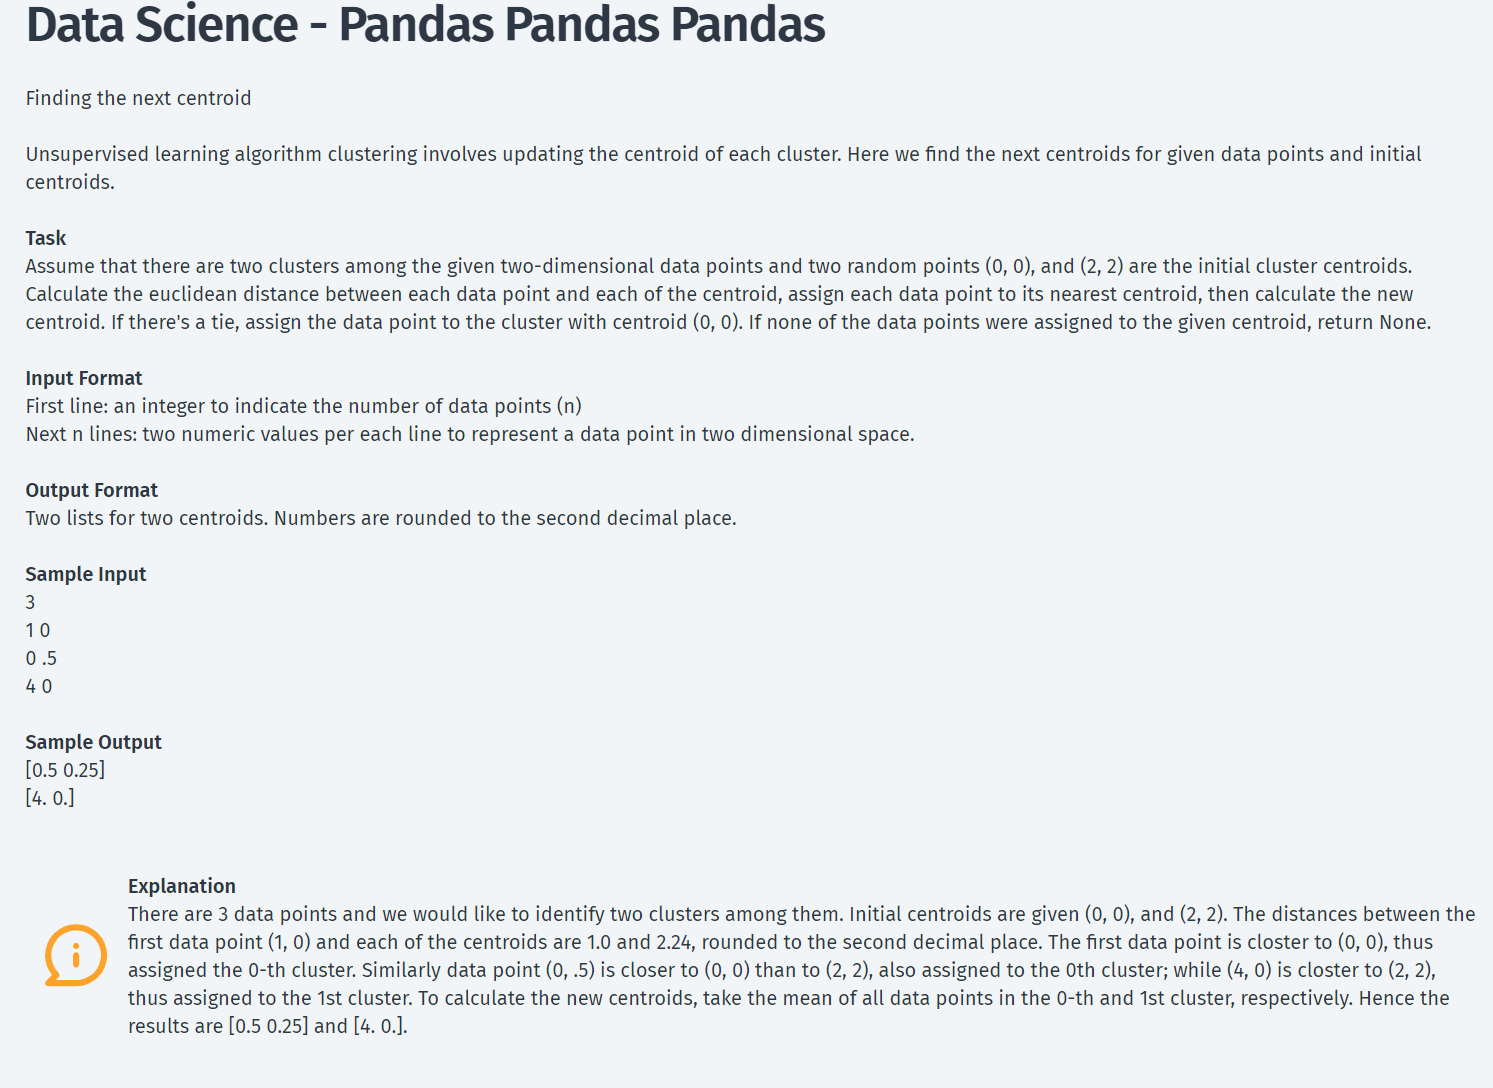

In [57]:
import numpy as np

# Initial centroids
first_centroid = np.array([[0., 0.]])
second_centroid = np.array([[2., 2.]])

# Number of data points
n = int(input())

# Read data points
data = np.array([list(map(float, input().split())) for _ in range(n)])

# Calculate distances and assign points to clusters
distances_first = np.linalg.norm(data - first_centroid, axis=1)
distances_second = np.linalg.norm(data - second_centroid, axis=1)

first_cluster = data[distances_first <= distances_second]
second_cluster = data[distances_second < distances_first]

# Calculate new centroids
mean_first = np.round(np.mean(first_cluster, axis=0), 2) if len(first_cluster) > 0 else None
mean_second = np.round(np.mean(second_cluster, axis=0), 2) if len(second_cluster) > 0 else None

print(mean_first)
print(mean_second)

3
1 0
0 0.5
4. 0.
